In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv('sales_train_data.csv')

In [3]:
monthly_sales = sales_data.groupby(["date","date_block_num","shop_id","item_id"]).agg({'item_cnt_day':'sum'}).reset_index()

In [4]:
monthly_sales = monthly_sales.rename(columns={"item_cnt_day":"item_cnt_mnt"})

In [5]:
monthly_sales

,date,date_block_num,shop_id,item_id,item_cnt_mnt
0,01.01.2013,0,2,991,1.0
1,01.01.2013,0,2,1472,1.0
2,01.01.2013,0,2,1905,1.0
3,01.01.2013,0,2,2920,2.0
4,01.01.2013,0,2,3320,1.0
...,...,...,...,...,...
2935816,31.12.2014,23,59,20404,1.0
2935817,31.12.2014,23,59,20610,1.0
2935818,31.12.2014,23,59,20949,5.0
2935819,31.12.2014,23,59,21762,1.0


In [6]:
monthly_sales.describe()

,date_block_num,shop_id,item_id,item_cnt_mnt
count,2.935821e+06,2.935821e+06,2.935821e+06,2.935821e+06
mean,1.456992e+01,3.300172e+01,1.019720e+04,1.242653e+00
std,9.422983e+00,1.622699e+01,6.324297e+03,2.618847e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,2.169000e+03


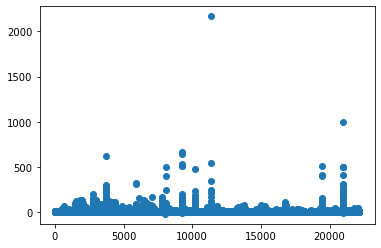

In [7]:
plt.scatter(monthly_sales["item_id"], monthly_sales["item_cnt_mnt"])

In [8]:
from plotly.offline import iplot
import plotly as ply
import plotly.tools as tls
import cufflinks as cf

In [10]:
ply.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
import seaborn as sns

In [11]:
%config Completer.use_jedi = False

{'whiskers': [<matplotlib.lines.Line2D at 0x1a695e8f310>,
 'caps': [<matplotlib.lines.Line2D at 0x1a695e8f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a695e83f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a695e9b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a695e9b430>],
 'means': []}

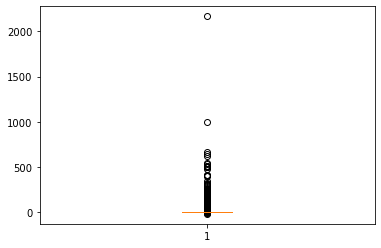

In [13]:
plt.boxplot(monthly_sales["item_cnt_mnt"])

In [14]:
monthly_sales["item_cnt_mnt"][monthly_sales["item_cnt_mnt"].apply(lambda x: x>500)]

180746      512.0
865827      508.0
1275504     624.0
1339930    1000.0
1743820     539.0
2033916     502.0
2623481     501.0
2656833    2169.0
2740368     504.0
2741450     533.0
2833780     669.0
2834690     637.0
Name: item_cnt_mnt, dtype: float64

In [15]:
monthly_sales

,date,date_block_num,shop_id,item_id,item_cnt_mnt
0,01.01.2013,0,2,991,1.0
1,01.01.2013,0,2,1472,1.0
2,01.01.2013,0,2,1905,1.0
3,01.01.2013,0,2,2920,2.0
4,01.01.2013,0,2,3320,1.0
...,...,...,...,...,...
2935816,31.12.2014,23,59,20404,1.0
2935817,31.12.2014,23,59,20610,1.0
2935818,31.12.2014,23,59,20949,5.0
2935819,31.12.2014,23,59,21762,1.0


In [16]:
monthly_sales[monthly_sales.duplicated(keep='last')]

,date,date_block_num,shop_id,item_id,item_cnt_mnt


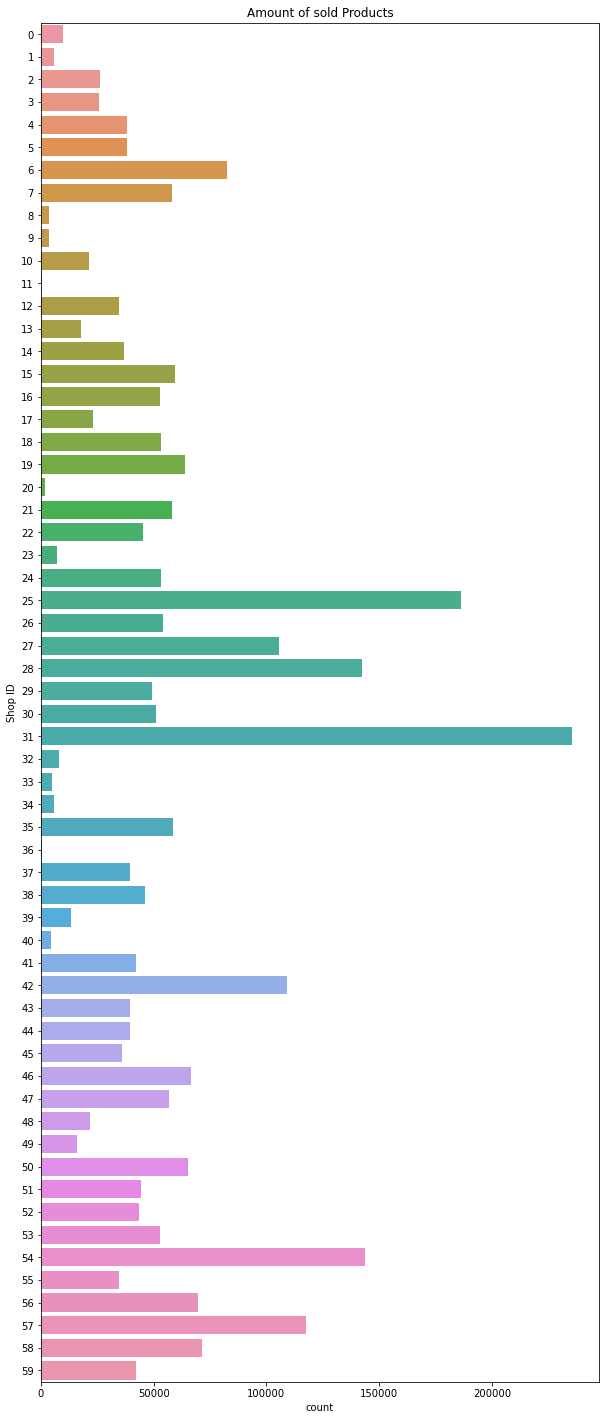

In [18]:
plt.figure(figsize=(10,25))
sns.countplot(y=monthly_sales["shop_id"])
plt.ylabel("Shop ID")
plt.title("Amount of sold Products")
plt.show()

In [22]:
pivot_train = sales_data.pivot_table(index=['shop_id','item_id'], columns='date_block_num',
                                        values='item_cnt_day', aggfunc='sum').fillna(0.0)

In [23]:
pivot_train

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...              ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59      22154    1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22155    0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
        22162    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22164    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22167    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  
59      22154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[424124 rows x 34 columns]

In [25]:
#clean the data
train_clean_df = pivot_train.reset_index()
train_clean_df["shop_id"] = train_clean_df.shop_id.astype('str')
train_clean_df["item_id"] = train_clean_df.item_id.astype('str')

In [27]:
item_categories = pd.read_csv("item_categories.csv")

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [29]:
items = pd.read_csv("items.csv")
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [33]:
item_to_cat_df = items.merge(item_categories[['item_category_id','item_category_name']], how="inner",
                             on='item_category_id')[['item_id','item_category_name']]

In [35]:
item_to_cat_df["item_id"] = item_to_cat_df.item_id.astype('str')

In [36]:
train_clean_df = train_clean_df.merge(item_to_cat_df, how='inner', on="item_id")

In [37]:
train_clean_df

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Кино - DVD
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,9760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray
424120,59,12846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray
424121,59,16270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Программы - Для дома и офиса
424122,59,17732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Игры PC - Дополнительные издания


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
number = LabelEncoder()

In [40]:
train_clean_df['item_category_name'] = number.fit_transform(train_clean_df.item_category_name)

In [41]:
train_clean_df = train_clean_df[['shop_id','item_id','item_category_name'] + list(range(34))]

In [42]:
train_clean_df.head()

,shop_id,item_id,item_category_name,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,40,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,40,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,40,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,40,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,40,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
!pip install xgboost

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [47]:
# Set the parameters for model
param = {'max_depth': 13, 
         'subsample':1,
         'min_child_weight': 0.7,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse',
         'n_estimators': 120}

# Create DMatrix to train the model
progress = dict()
xgbtrain = xgb.DMatrix(train_clean_df.iloc[:,  (train_clean_df.columns != 33)].values, train_clean_df.iloc[:, train_clean_df.columns == 33].values)
watchlist  = [(xgbtrain,'train-rmse')]

# Train the model
bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(train_clean_df.iloc[:,  (train_clean_df.columns != 33)].values))
rmse = np.sqrt(mean_squared_error(preds,train_clean_df.iloc[:, train_clean_df.columns == 33].values))

# Print the RMSE of the model
print(rmse)

[21:08:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators", "num_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


1.1426087795020126


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

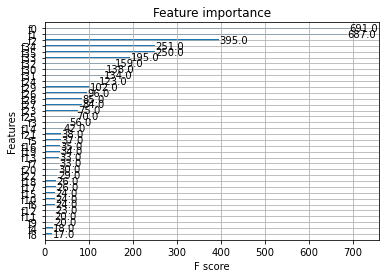

In [49]:
xgb.plot_importance(bst)

In [51]:
test = pd.read_csv('test_data.csv')

In [53]:
# Preprocess the testing dataframe
apply_df = test
apply_df['shop_id'] = apply_df.shop_id.astype('str')
apply_df['item_id'] = apply_df.item_id.astype('str')

apply_df = test.merge(train_clean_df, how="left", on=["shop_id", "item_id"]).fillna(0.0)

# Take a quick look at testing data after preprocessing
apply_df.head()

,ID,shop_id,item_id,item_category_name,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
d = dict(zip(apply_df.columns[4:],list(np.array(list(apply_df.columns[4:])) - 1)))

apply_df = apply_df.rename(d, axis = 1)

In [55]:
# Get the predictions
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))

In [56]:
# Get general info about our predictions
preds = list(map(lambda x: min(20, max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID': apply_df.ID, 'item_cnt_month': preds})
sub_df.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.269465
std,61834.358168,0.736134
min,0.000000,0.000000
25%,53549.750000,0.093975
50%,107099.500000,0.129788
75%,160649.250000,0.212419
max,214199.000000,20.000000


In [57]:
# Convert the predictions we got to the csv
sub_df.to_csv('submission.csv', index=False)